# Extract data from output files

March 9, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import subprocess as sp
import sys
import os
import glob

In [2]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

## Extract image data 

In [3]:
main_dir='/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/20200313_132158_exagan/dump_outs/'

In [4]:
train_gen_img_lst=glob.glob(main_dir+'model0-training*-gen_img*-output0.npy')
train_inp_img_lst=glob.glob(main_dir+'model0-training*-inp_img*-output0.npy')

val_gen_img_lst=glob.glob(main_dir+'model0-validation*-gen_img*-output0.npy')
val_inp_img_lst=glob.glob(main_dir+'model0-validation*-inp_img*-output0.npy')


In [5]:
fname=train_gen_img_lst[0]
a1=np.load(fname)

In [12]:
img=a1[0,0,:,:]
print(a1.shape,img.shape)

(64, 1, 128, 128) (128, 128)


### View single image

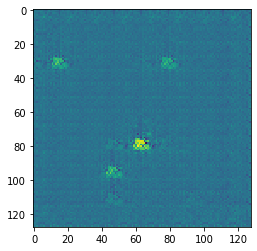

In [14]:
plt.figure()
plt.imshow(img)